In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from scipy.stats import mode


df = pd.read_csv('final_embeddings_with_class.csv')
target_column = 'class'
X = df.drop(columns=[target_column]).values
y = df[target_column].values


# 2. Split the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# 3. Train Individual Classifiers

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, n_iter_no_change=10, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(y_test, y_pred_gb, average='weighted')

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')


# 4. Majority Voting Fusion

# Stack predictions (each row corresponds to one classifier)
predictions = np.vstack((y_pred_gb, y_pred_rf))  
# Apply majority voting using scipy.stats.mode along axis 0
majority_vote, _ = mode(predictions, axis=0)
majority_vote = majority_vote.flatten()
accuracy_mv = accuracy_score(y_test, majority_vote)
precision_mv, recall_mv, f1_mv, _ = precision_recall_fscore_support(y_test, majority_vote, average='weighted')

# 5. Print the Scores

print("Gradient Boosting (GB):")
print("Accuracy:  {:.4f}".format(accuracy_gb))
print("Precision: {:.4f}".format(precision_gb))
print("Recall:    {:.4f}".format(recall_gb))
print("F1 Score:  {:.4f}".format(f1_gb))
print()

print("Random Forest (RF):")
print("Accuracy:  {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall:    {:.4f}".format(recall_rf))
print("F1 Score:  {:.4f}".format(f1_rf))
print()

print("Majority Voting Ensemble:")
print("Accuracy:  {:.4f}".format(accuracy_mv))
print("Precision: {:.4f}".format(precision_mv))
print("Recall:    {:.4f}".format(recall_mv))
print("F1 Score:  {:.4f}".format(f1_mv))


Gradient Boosting (GB):
Accuracy:  0.5165
Precision: 0.5864
Recall:    0.5165
F1 Score:  0.5248

Random Forest (RF):
Accuracy:  0.5385
Precision: 0.5769
Recall:    0.5385
F1 Score:  0.5347

Majority Voting Ensemble:
Accuracy:  0.5385
Precision: 0.6689
Recall:    0.5385
F1 Score:  0.5296


In [6]:
from tabulate import tabulate

# Define the data as a list of lists
data = [
    ["Gradient Boosting (GB)", 0.5165, 0.5864, 0.5165, 0.5248],
    ["Random Forest (RF)", 0.5385, 0.5769, 0.5385, 0.5347],
    ["Majority Voting Ensemble", 0.5385, 0.6689, 0.5385, 0.5296]
]

# Create a DataFrame
df = pd.DataFrame(data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Print the table using tabulate
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+--------------------------+----------+-----------+--------+----------+
|          Model           | Accuracy | Precision | Recall | F1 Score |
+--------------------------+----------+-----------+--------+----------+
|  Gradient Boosting (GB)  |  0.5165  |  0.5864   | 0.5165 |  0.5248  |
|    Random Forest (RF)    |  0.5385  |  0.5769   | 0.5385 |  0.5347  |
| Majority Voting Ensemble |  0.5385  |  0.6689   | 0.5385 |  0.5296  |
+--------------------------+----------+-----------+--------+----------+


/var/folders/jf/wmpckfqd1dl9dg_xhxpd1vxw0000gn/T/ipykernel_17076/3676116251.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, ci=None, edgecolor='black')


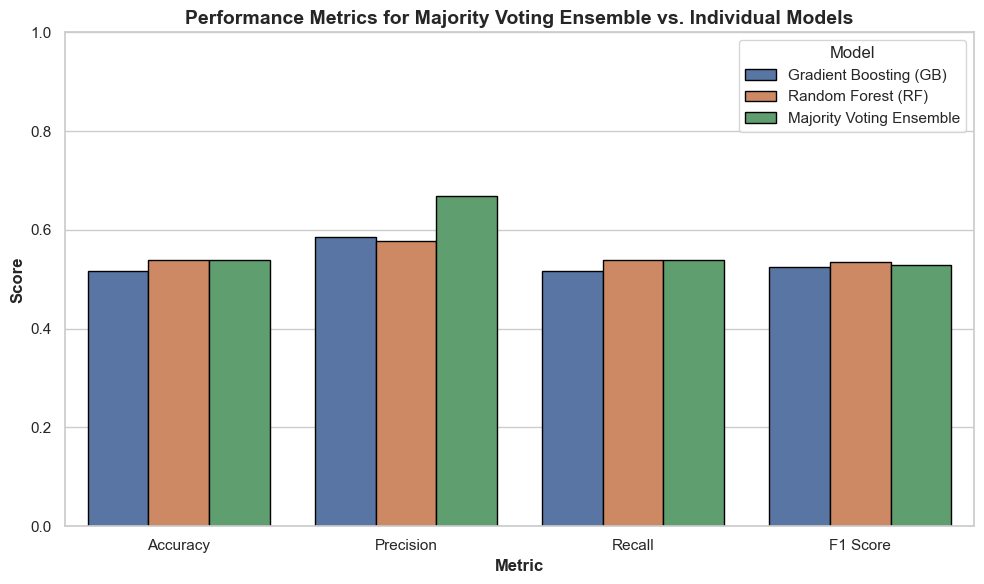

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the metrics for each model
data = [
    ["Gradient Boosting (GB)", 0.5165, 0.5864, 0.5165, 0.5248],
    ["Random Forest (RF)", 0.5385, 0.5769, 0.5385, 0.5347],
    ["Majority Voting Ensemble", 0.5385, 0.6689, 0.5385, 0.5296]
]

df = pd.DataFrame(data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Melt the DataFrame to "long" format for easier plotting with seaborn
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, ci=None, edgecolor='black')
plt.ylim(0, 1)
plt.title("Performance Metrics for Majority Voting Ensemble vs. Individual Models", fontsize=14, fontweight='bold')
plt.xlabel("Metric", fontsize=12, fontweight='bold')
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.legend(title="Model", loc="upper right")
plt.tight_layout()
plt.show()
